In [33]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

In [34]:
mp_face = mp.solutions.face_mesh
mp_pose = mp.solutions.pose

def detect_face_landmarks(image):
    with mp_face.FaceMesh(static_image_mode=True, max_num_faces=1) as face_mesh:
        results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if not results.multi_face_landmarks:
            return None
        return results.multi_face_landmarks[0]

def detect_pose_landmarks(image):
    with mp_pose.Pose(static_image_mode=True) as pose:
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if not results.pose_landmarks:
            return None
        return results.pose_landmarks


In [35]:
def draw_landmarks(image, face_landmarks=None, pose_landmarks=None):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8,8))
    plt.imshow(image_rgb)
    
    if face_landmarks:
        for lm in face_landmarks.landmark:
            x, y = int(lm.x * image.shape[1]), int(lm.y * image.shape[0])
            plt.scatter(x, y, c='red', s=5)
    if pose_landmarks:
        for lm in pose_landmarks.landmark:
            x, y = int(lm.x * image.shape[1]), int(lm.y * image.shape[0])
            plt.scatter(x, y, c='blue', s=5)
    plt.axis('off')
    plt.show()


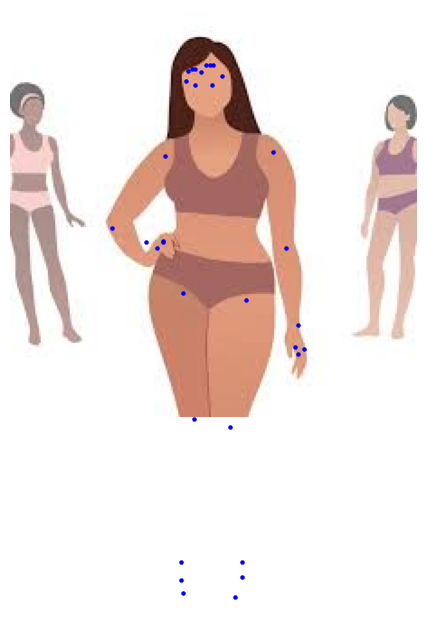

In [36]:
image = cv2.imread(r'C:\Users\lenovo\Desktop\AI_Styler_Project\image.jpeg')
face_lm = detect_face_landmarks(image)
pose_lm = detect_pose_landmarks(image)
draw_landmarks(image, face_lm, pose_lm)

In [37]:
def classify_face_shape(face_landmarks, img_w, img_h):
    if not face_landmarks:
        return "unknown"
    lm = face_landmarks.landmark
    # Exemple: calcul simple ratio largeur vs hauteur visage
    left_cheek = lm[234]
    right_cheek = lm[454]
    chin = lm[152]
    forehead = lm[10]
    face_width = abs(right_cheek.x - left_cheek.x) * img_w
    face_height = abs(chin.y - forehead.y) * img_h
    ratio = face_height / face_width
    if ratio > 1.1:
        return "oval"
    elif ratio > 0.9:
        return "round"
    else:
        return "square"
    
shape = classify_face_shape(face_lm, image.shape[1], image.shape[0])
print("Forme du visage détectée :", shape)


Forme du visage détectée : unknown


In [38]:
def classify_body_shape(pose_landmarks, img_w, img_h):
    if not pose_landmarks:
        return "unknown"

    lm = pose_landmarks.landmark

    # Shoulder coordinates
    left_shoulder_x = lm[11].x
    right_shoulder_x = lm[12].x
    left_shoulder_y = lm[11].y
    right_shoulder_y = lm[12].y

    # Hip coordinates
    left_hip_x = lm[23].x
    right_hip_x = lm[24].x
    left_hip_y = lm[23].y
    right_hip_y = lm[24].y

    # Convert to pixel distances
    shoulder_width = abs(right_shoulder_x - left_shoulder_x) * img_w
    hip_width = abs(right_hip_x - left_hip_x) * img_w

    # Debug values
    print(f"Shoulder width: {shoulder_width:.2f}px, Hip width: {hip_width:.2f}px")

    # Add tolerance to avoid misclassification
    tolerance = 0.05  # 5%

    if hip_width > shoulder_width * (1 + tolerance):
        shape = "Pear"
    elif shoulder_width > hip_width * (1 + tolerance):
        shape = "Inverted Triangle"
    else:
        shape = "Rectangle"

    # Show result
    print(f"Detected Body Shape: {shape}")
    return shape


In [39]:
body_shape = classify_body_shape(pose_lm, image.shape[1], image.shape[0])


Shoulder width: 59.30px, Hip width: 34.29px
Detected Body Shape: Inverted Triangle
